# Análisis, Visualización y Curación de Datos

# Consigna 6

#### Calcular el tamaño del vocabulario del tutor y del estudiante por separado. Calcular los mismos valores pero eliminando las palabras que se repiten 3 o menos veces.


## Importación de modulos
---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from collections import Counter
import re

from columns_to_keep import C2K
from type_to_fix import T2F

np.random.seed(654802)

## Carga la tabla de mensajes preprocesados
---

In [2]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'train_yup_messages_preprocessed.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
dfd = pd.read_csv(full_data_file_name)

# Caracterización del dataset de mensajes
print ('Dimensiones del dataset de mensajes')
print ('Filas: {}'.format(dfd.shape[0]))
print ('Columnas: {}'.format(dfd.shape[1]))
print ('Cantidad de sesiones: ', dfd['session_id'].nunique())
print ('Cantidad de turnos: {}'.format(dfd.shape[0]))
print ('Cantidad de turnos del tutor: {}'.format(len(dfd[dfd.sent_from=='tutor'])))
print ('Cantidad de turnos del estudiante: {}'.format(len(dfd[dfd.sent_from=='student'])))

Dimensiones del dataset de mensajes
Filas: 1102917
Columnas: 6
Cantidad de sesiones:  17987
Cantidad de turnos: 1102917
Cantidad de turnos del tutor: 567931
Cantidad de turnos del estudiante: 420866


### Conversion de `str` a `list` campo text

In [3]:
dfd['text'] = dfd.text.apply(lambda x: literal_eval(x))

### Limpieza: Unificación de las expresiones algebraicas bajo el tag `<math>` 

In [43]:
# Los unigramas que contienen al menos un dígito y al menos un operador algebraico se unifican bajo el tag <math> 
# usando una expresión regular

r = re.compile('\d*[\+,\-,\*,\/,\^]\d*')
dfd['text'] = dfd.text.apply(lambda x: ['<math>' if r.match(w) else w for w in x])

## Cálculos
---

**Pasos:**

1. Conteo de palabras de tutores y estudiantes por separado
    1. Unigramas
    2. Bigramas
    3. Trigramas
2. Filtrado de palabras (unigramas) que no se repiten más de tres veces


In [5]:
# 1.A
tutores_counts = Counter([ token for tokens in dfd[dfd.sent_from=='tutor'].text  for token in tokens])
students_counts = Counter([ token for tokens in dfd[dfd.sent_from=='student'].text  for token in tokens])

# 1.B
tuto_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-2+1)]
stud_counts_bg = [' '.join(tokens[i:2+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-2+1)]
tuto_counts_bg = Counter(tuto_counts_bg)
stud_counts_bg = Counter(stud_counts_bg)

# 1.C
tuto_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='tutor'].text for i in range(len(tokens)-3+1)]
stud_counts_tg = [' '.join(tokens[i:3+i]) for tokens in dfd[dfd.sent_from=='student'].text for i in range(len(tokens)-3+1)]
tuto_counts_tg = Counter(tuto_counts_tg)
stud_counts_tg = Counter(stud_counts_tg)

# 2.
tutores_counts_wr = list(filter(lambda x:x[1]>3, tutores_counts.most_common()))
students_counts_wr = list(filter(lambda x:x[1]>3, students_counts.most_common()))


In [6]:
len_tutores_counts = len(tutores_counts)
len_students_counts = len(students_counts)

len_tutores_counts_wr = len(tutores_counts_wr)
len_students_counts_wr = len(students_counts_wr)

print('\n### Vocabulario de los Tutores: ###')
print(f'Tamaño del vocabulario de los tutores: {len_tutores_counts}')
print(f'Tamaño del vocabulario de los tutores (frecuencia mayor que 3): {len_tutores_counts_wr}')
print(f'El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el {100*len_tutores_counts_wr/len_tutores_counts:.2f}% del vocabulario total')

print('\n###  Vocabulario de los Estudiantes: ###')
print(f'Tamaño del vocabulario de los estudiantes: {len_students_counts}')
print(f'Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): {len_students_counts_wr}')
print(f'El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el {100*len_students_counts_wr/len_students_counts:.2f}% del vocabulario total')

print('\n### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###')
print('Considerando los unigramas con frecuencia mayor a 3:')
print(f'El tamaño del vocabulario los estudiantes representa el {100*len_students_counts_wr/len_tutores_counts_wr:.2f}% del tamaño del vocabulario de los tutores')




### Vocabulario de los Tutores: ###
Tamaño del vocabulario de los tutores: 45639
Tamaño del vocabulario de los tutores (frecuencia mayor que 3): 12683
El tamaño del vocabulario compuesto por unigramas frecuencia mayor que 3 representa el 27.79% del vocabulario total

###  Vocabulario de los Estudiantes: ###
Tamaño del vocabulario de los estudiantes: 40090
Tamaño del vocabulario de los estudiantes (frecuencia mayor que 3): 8116
El tamaño del vocabulario compuesto por unigramas con frecuencia mayor que 3 representa el 20.24% del vocabulario total

### Relación entre el tamaño de los vocabularios de tutores y estudiantes: ###
Considerando los unigramas con frecuencia mayor a 3:
El tamaño del vocabulario los estudiantes representa el 63.99% del tamaño del vocabulario de los tutores


# Consigna 7 y 8

#### Realizar un gráfico frecuencia de unigramas del tutor. ¿Se cumple la ley de Zipf? Visualizar los 20 unigramas más frecuentes, los 20 unigramas menos frecuentes y 20 unigramas aleatorios en el medio de la distribución. Tratar de caracterizar las palabras, sacar conclusiones sobre qué tipo de palabras son, si son valiosas o no y cómo podríamos explotarlas o eliminar el ruido que traen. Hacer lo mismo para 2-gramas y 3 gramas.

#### Realizar el mismo análisis, pero sobre los turnos del estudiante. Opcional: Repetir el análisis quitando las palabras con una frecuencia menor o igual que 3.

## Ley de Zipf respecto de los unigramas del tutor y del estudiante

In [7]:
#################################################################
# Tutores: 
## Conteo de Unigramas, Bigramas y Trigramas
t_unigrams_counts = [i[1] for i in tutores_counts.most_common()]
t_bigrams_counts = [i[1] for i in tuto_counts_bg.most_common()]
t_trigrams_counts = [i[1] for i in tuto_counts_tg.most_common()]

## Unigramas, Bigramas y Trigramas
t_unigrams = [i[0] for i in tutores_counts.most_common()]
t_bigrams = [i[0] for i in tuto_counts_bg.most_common()]
t_trigrams = [i[0] for i in tuto_counts_tg.most_common()]

#################################################################
# Estudiantes:
## Conteo de Unigramas, Bigramas y Trigramas
s_unigrams_counts = [i[1] for i in students_counts.most_common()]
s_bigrams_counts = [i[1] for i in stud_counts_bg.most_common()]
s_trigrams_counts = [i[1] for i in stud_counts_tg.most_common()]

## Unigramas, Bigramas y Trigramas
s_unigrams = [i[0] for i in students_counts.most_common()]
s_bigrams = [i[0] for i in stud_counts_bg.most_common()]
s_trigrams = [i[0] for i in stud_counts_tg.most_common()]

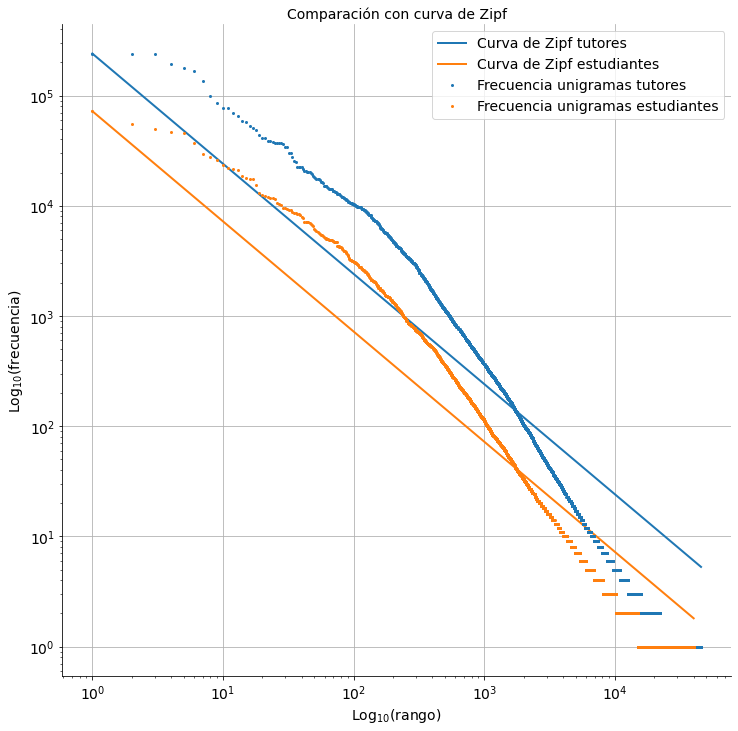

In [8]:
st = 1
ss = 1
n = np.array(list(range(1,1+len(t_unigrams_counts))))
nn = t_unigrams_counts[0] / (n**st)

m = np.array(list(range(1,1+len(s_unigrams_counts))))
mm = s_unigrams_counts[0] / (m**ss)

plt.figure(figsize=(12,12))
plt.loglog(n, nn, '-b', linewidth=2, label="Curva de Zipf tutores", color='tab:blue')
plt.loglog(m, mm, '-y', linewidth=2, label="Curva de Zipf estudiantes", color='tab:orange')
plt.loglog(n, t_unigrams_counts, 'o', label="Frecuencia unigramas tutores", color='tab:blue', markersize=2)
plt.loglog(m, s_unigrams_counts, 'o', label="Frecuencia unigramas estudiantes", color='tab:orange', markersize=2)
plt.grid(True)
plt.xlabel(r'Log$_{10}$(rango)', fontsize=14)
plt.ylabel(r'Log$_{10}$(frecuencia)', fontsize=14)
plt.title("Comparación con curva de Zipf", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
sns.despine()

## Unigramas del tutor
#### Los 20 unigramas más frecuentes, los 20 menos frecuentes y 20 unigramas aleatorios en el medio de la distribución
---

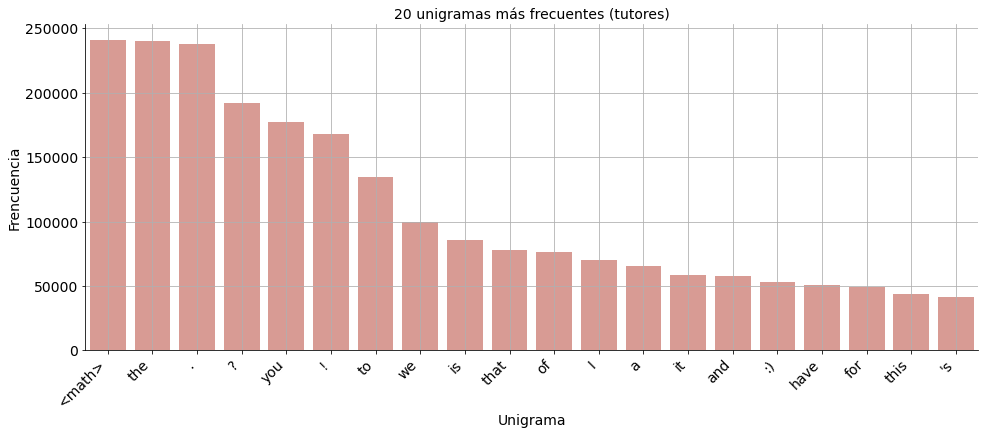

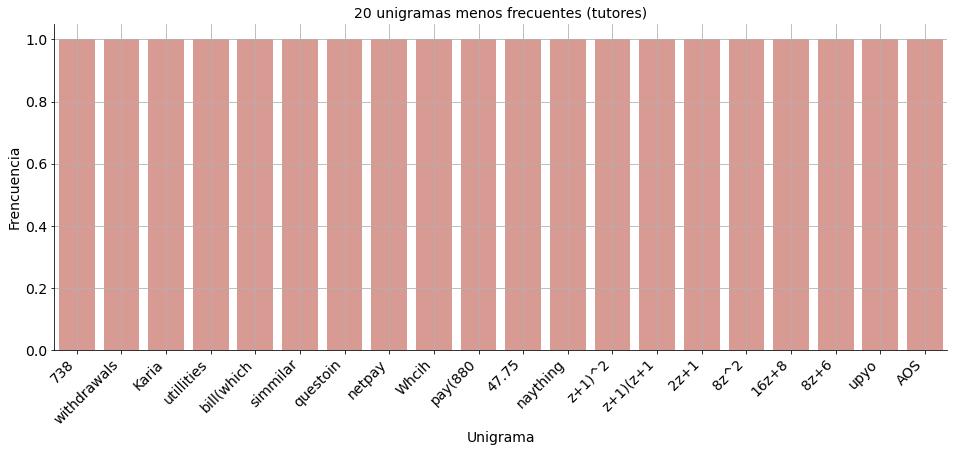

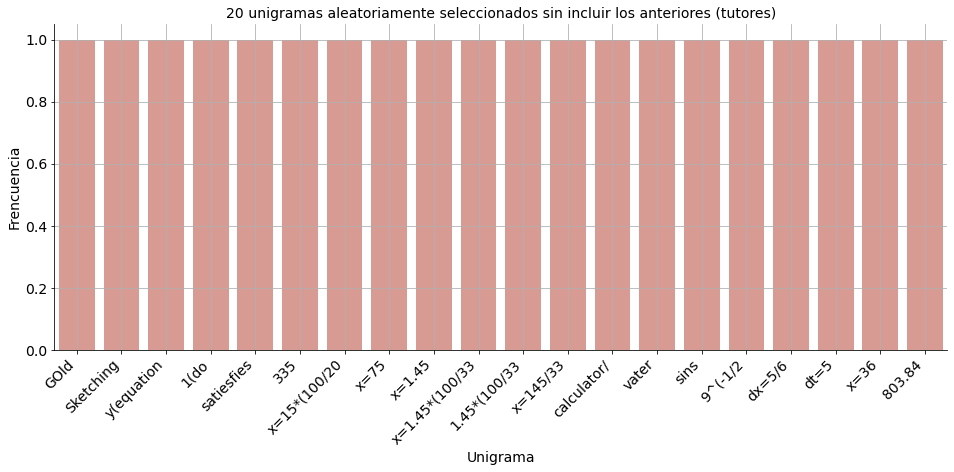

In [9]:
# Unigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[0:20], y=t_unigrams_counts[0:20], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_unigrams[-20::1], y=t_unigrams_counts[-20::1], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len_tutores_counts -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_unigrams)[sample_indexs], y=np.array(t_unigrams_counts)[sample_indexs], color="salmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

## Unigramas del estudiante
#### Los 20 unigramas más frecuentes, los 20 menos frecuentes y 20 unigramas aleatorios en el medio de la distribución
---

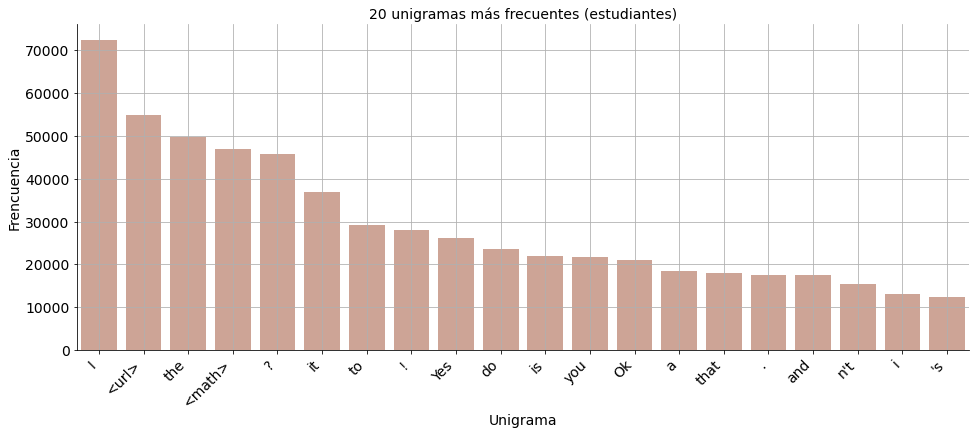

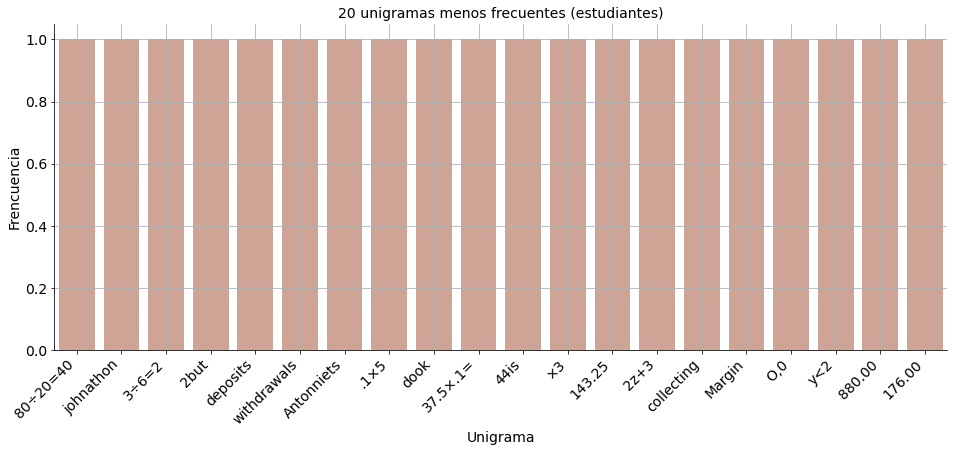

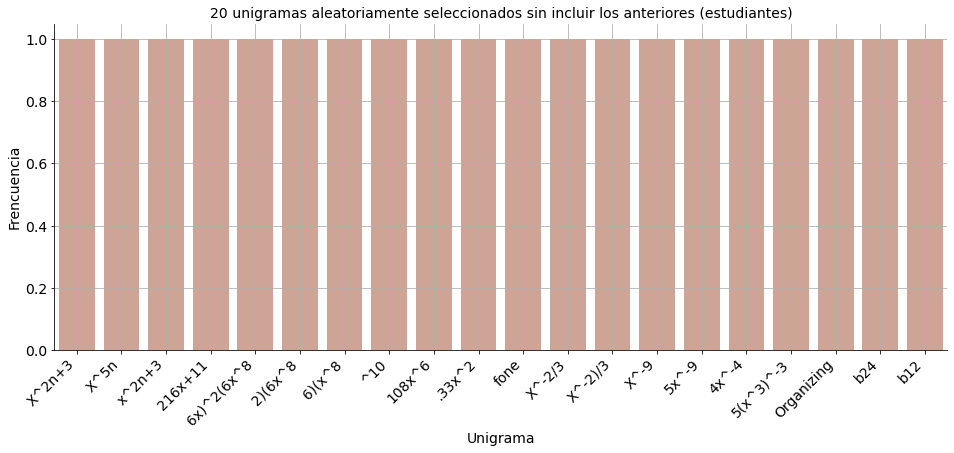

In [10]:
# Unigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams[0:20], y=s_unigrams_counts[0:20], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_unigrams[-20::1], y=s_unigrams_counts[-20::1], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Unigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len_students_counts -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_unigrams)[sample_indexs], y=np.array(s_unigrams_counts)[sample_indexs], color="darksalmon", saturation=.5)
plt.grid(True)
plt.xlabel('Unigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 unigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

## Bigramas del tutor
#### Los 20 bigramas más frecuentes, los 20 menos frecuentes y 20 bigramas aleatorios en el medio de la distribución
---

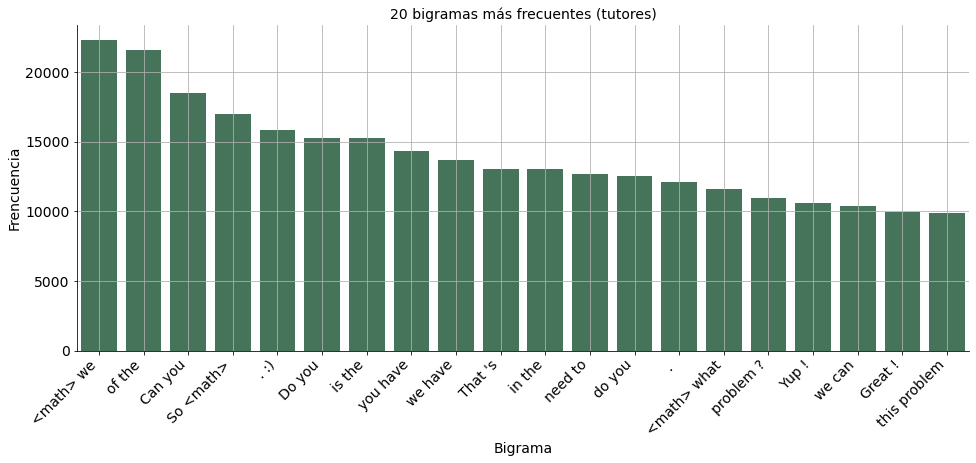

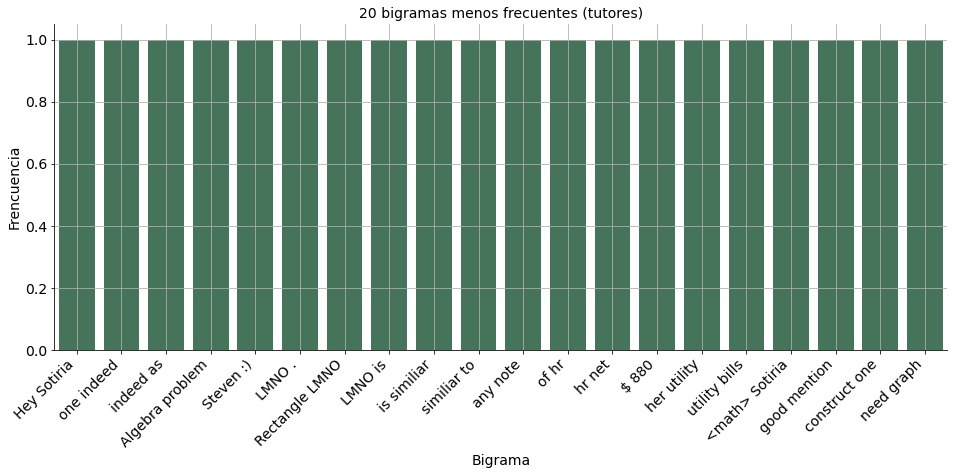

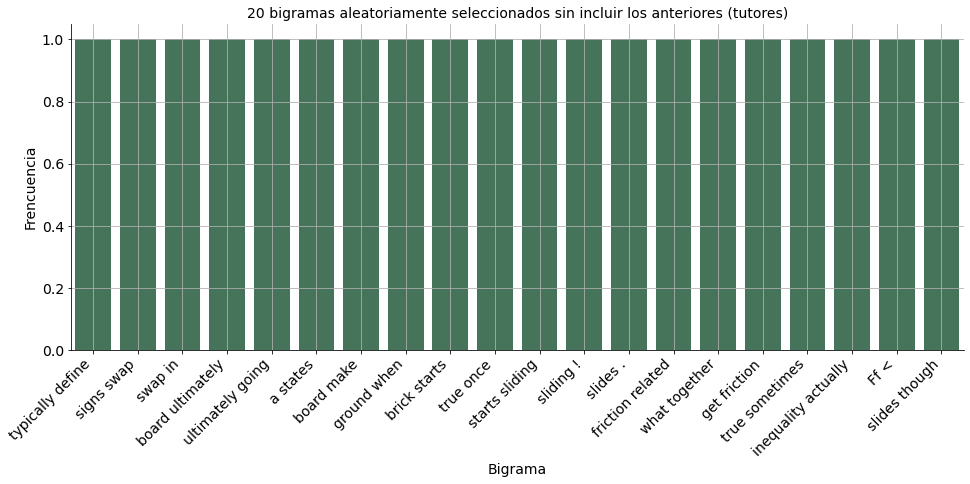

In [11]:
# Bigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams[0:20], y=t_bigrams_counts[0:20], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_bigrams[-20::1], y=t_bigrams_counts[-20::1], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len(t_bigrams) -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_bigrams)[sample_indexs], y=np.array(t_bigrams_counts)[sample_indexs], color="seagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

## Bigramas del estudiante
#### Los 20 bigramas más frecuentes, los 20 menos frecuentes y 20 bigramas aleatorios en el medio de la distribución
---

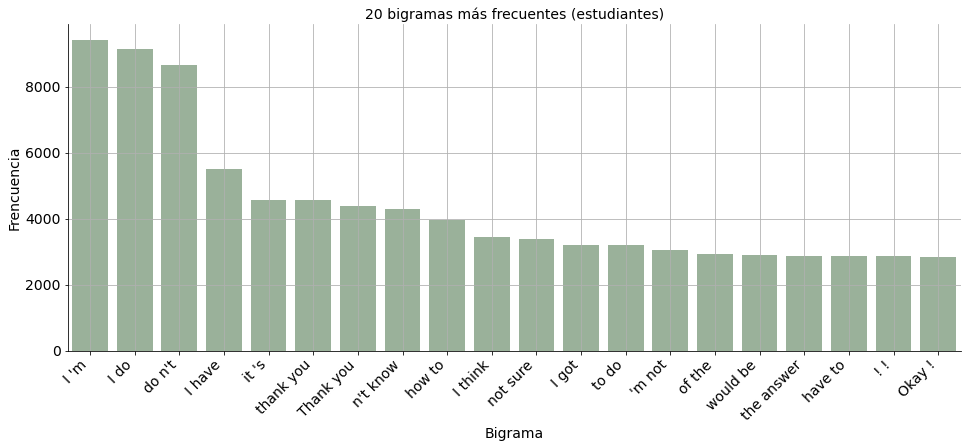

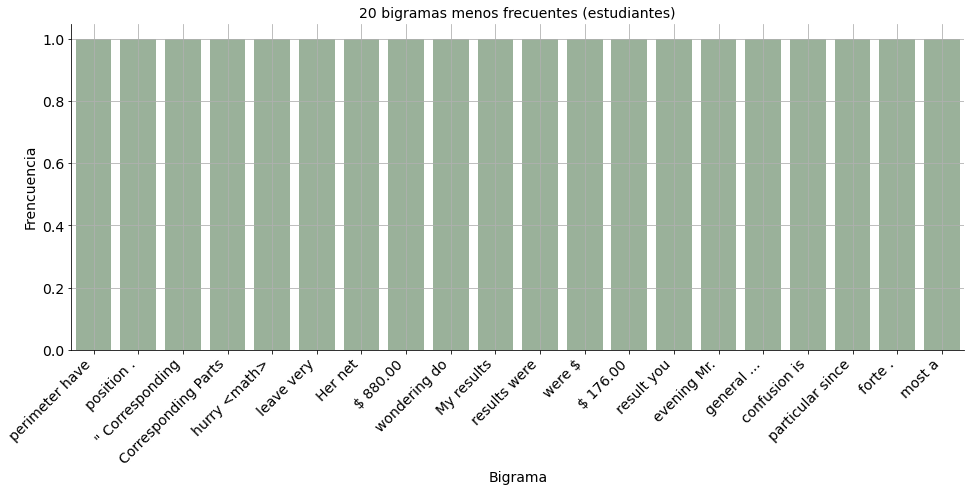

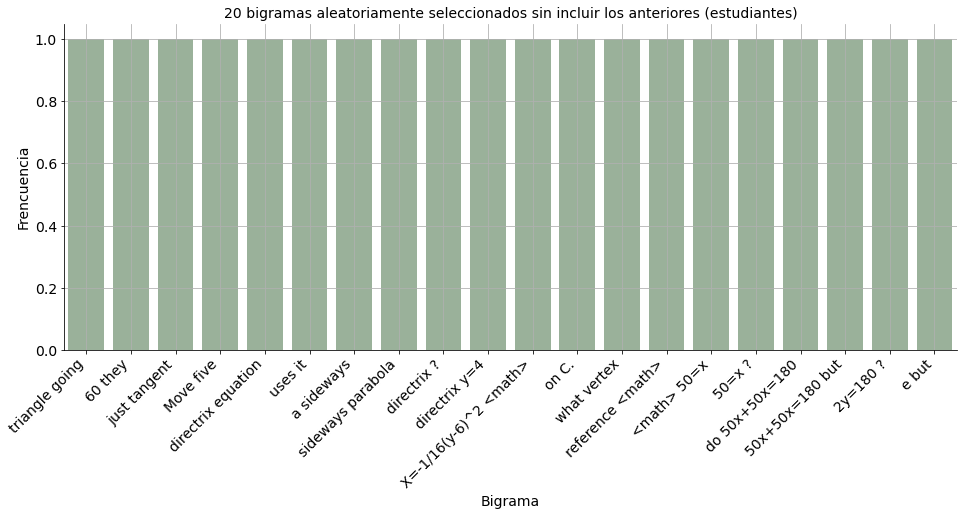

In [12]:
# Bigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams[0:20], y=s_bigrams_counts[0:20], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_bigrams[-20::1], y=s_bigrams_counts[-20::1], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Bigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len(s_bigrams) -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_bigrams)[sample_indexs], y=np.array(s_bigrams_counts)[sample_indexs], color="darkseagreen", saturation=.5)
plt.grid(True)
plt.xlabel('Bigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 bigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

## Trigramas del tutor
#### Los 20 trigramas más frecuentes, los 20 menos frecuentes y 20 trigramas aleatorios en el medio de la distribución
---

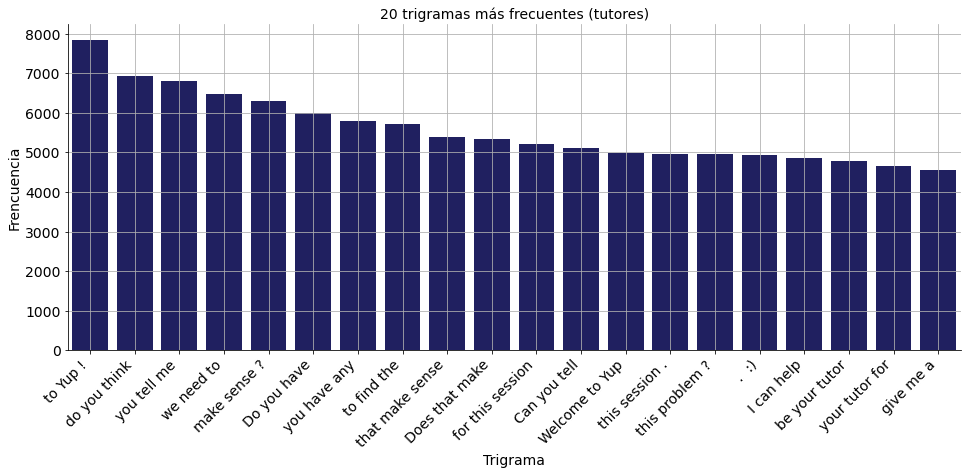

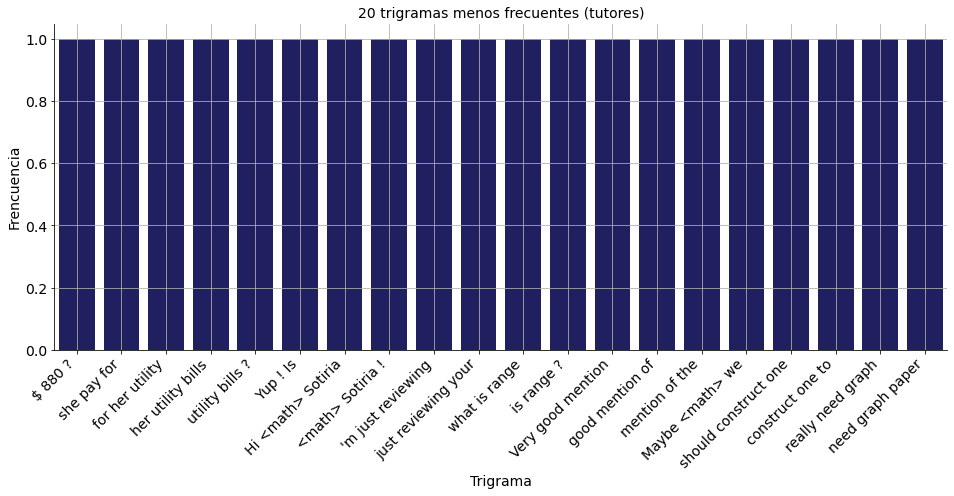

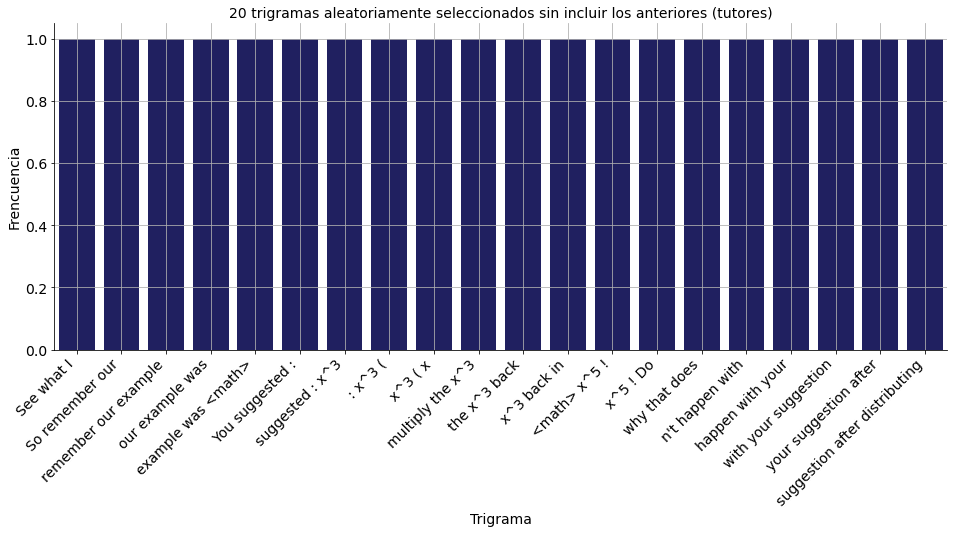

In [13]:
# Trigramas del tutor: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams[0:20], y=t_trigrams_counts[0:20], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del tutor: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=t_trigrams[-20::1], y=t_trigrams_counts[-20::1], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del tutor: 20 aleatorios
sample_index_t = np.random.randint(20, len(t_trigrams_counts) -40)
sample_indexs = np.asarray(range(sample_index_t,sample_index_t + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(t_trigrams)[sample_indexs], y=np.array(t_trigrams_counts)[sample_indexs], color="navy", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (tutores)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

/home/gustavo/anaconda3/envs/diplodatos/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/gustavo/anaconda3/envs/diplodatos/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


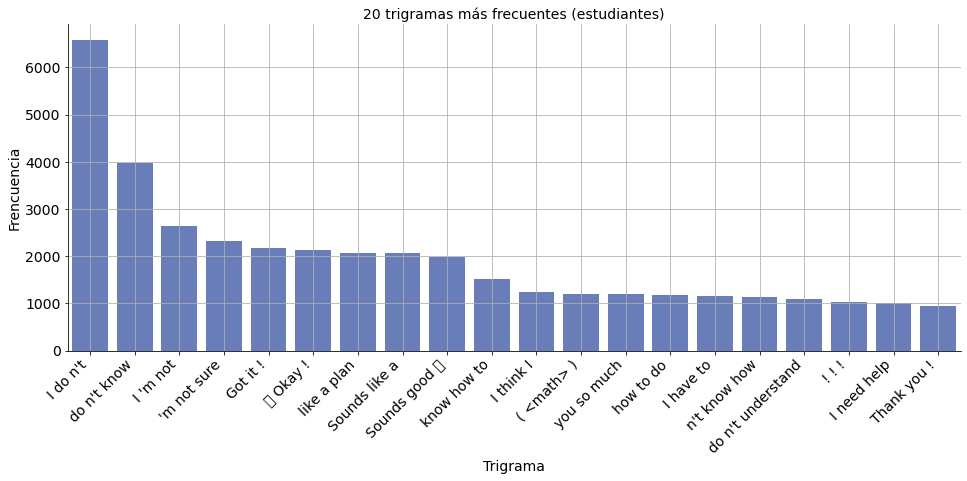

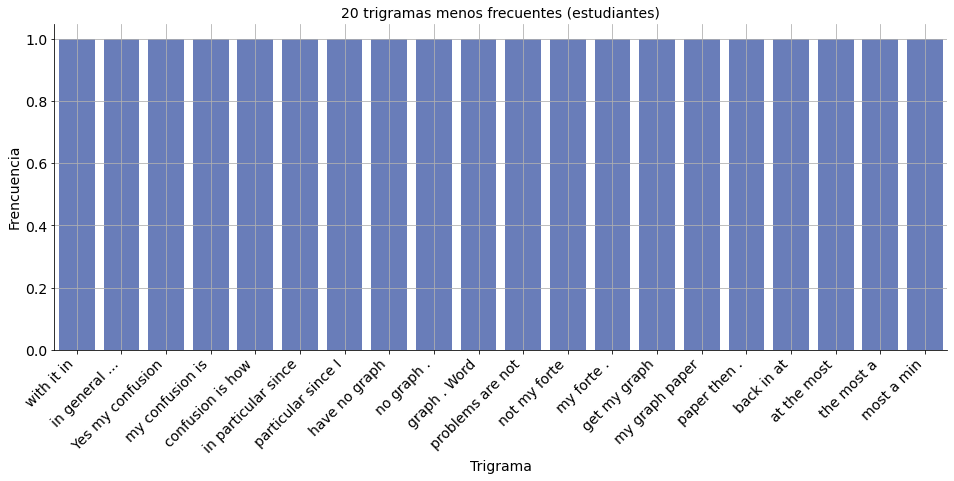

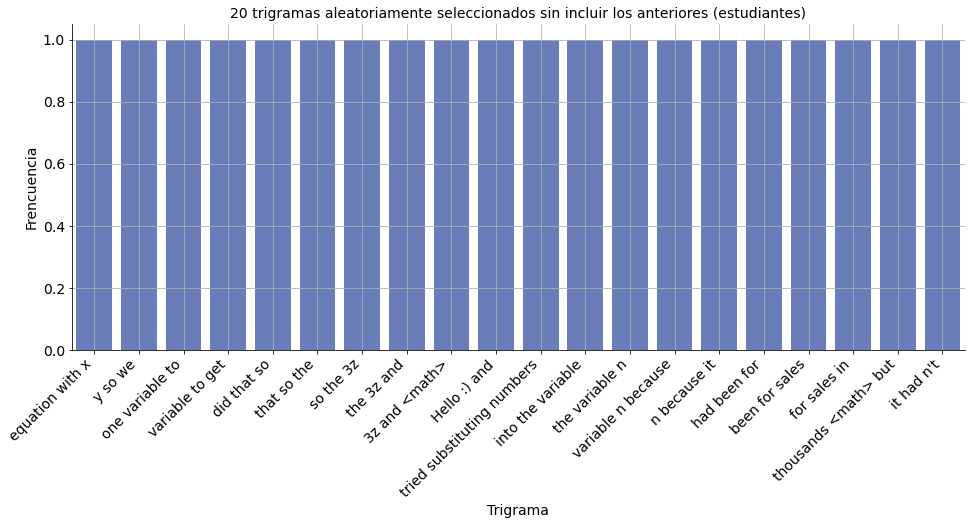

In [14]:
# Trigramas del estudiante: 20 más frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams[0:20], y=s_trigrams_counts[0:20], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas más frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del estudiante: 20 menos frecuentes
plt.figure(figsize=(16,6))
chart = sns.barplot(x=s_trigrams[-20::1], y=s_trigrams_counts[-20::1], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas menos frecuentes (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

# Trigramas del estudiante: 20 aleatorios
sample_index_s = np.random.randint(20, len(s_trigrams_counts) -40)
sample_indexs = np.asarray(range(sample_index_s,sample_index_s + 20))
plt.figure(figsize=(16,6))
chart = sns.barplot(x=np.array(s_trigrams)[sample_indexs], y=np.array(s_trigrams_counts)[sample_indexs], color="royalblue", saturation=.5)
plt.grid(True)
plt.xlabel('Trigrama', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('20 trigramas aleatoriamente seleccionados sin incluir los anteriores (estudiantes)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.despine()

## Frecuencia de n-gramas en el rango completo
#### Unigramas, bigramas y trigramas del tutor y del estudiante
---

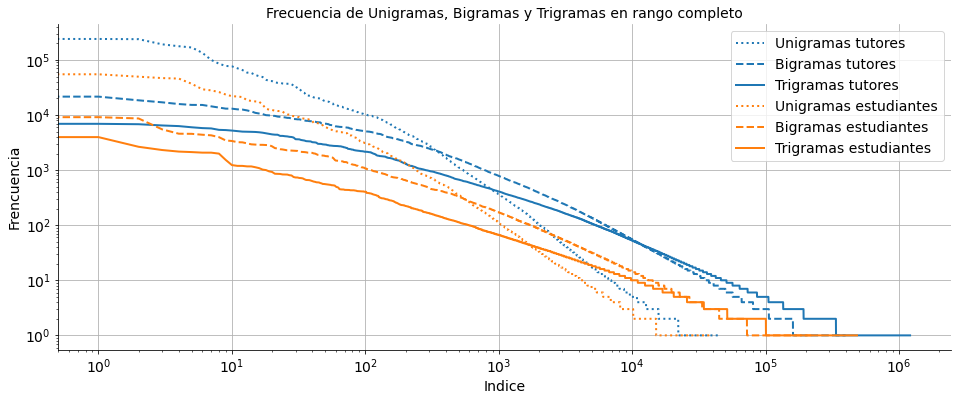

In [15]:
plt.figure(figsize=(16,6))
plt.loglog(t_unigrams_counts,':',label='Unigramas tutores', linewidth=2, color='tab:blue')
plt.loglog(t_bigrams_counts,'--',label='Bigramas tutores', linewidth=2, color='tab:blue')
plt.loglog(t_trigrams_counts,'-',label='Trigramas tutores', linewidth=2, color='tab:blue')
plt.loglog(s_unigrams_counts, ':',label='Unigramas estudiantes', linewidth=2, color='tab:orange')
plt.loglog(s_bigrams_counts,'--',label='Bigramas estudiantes', linewidth=2, color='tab:orange')
plt.loglog(s_trigrams_counts,'-',label='Trigramas estudiantes', linewidth=2, color='tab:orange')
plt.grid(True)
plt.legend(fontsize=14)
plt.xlabel('Indice', fontsize=14)
plt.ylabel('Frencuencia', fontsize=14)
plt.title('Frecuencia de Unigramas, Bigramas y Trigramas en rango completo', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

# Consigna 9

#### Intenten encontrar correlaciones entre palabras que ocurren una seguida de la otra, es decir, traten de identificar qué palabras ocurren más frecuentemente de lo que podríamos considerar casualidad detrás de otra palabra.

#### A esta medida se la llama Información Mutua y su instanciación en el Procesamiento del Lenguaje Natural se llama Información Mutua Puntual (IMP) [3].

#### Encuentren cómo se implementa, y encuentren las secuencias de palabras con mayor IMP. 

#### ¿Qué observan? ¿Nos van a resultar útiles para nuestro objetivo de predecir la satisfacción del estudiante?

https://stackoverflow.com/questions/22118350/python-sentiment-analysis-using-pointwise-mutual-information

## Implementación del cálculo de la Información Mutual Puntual IMP
#### Dada por la expresión:


### $$IMP(a,b) = \log_2 \left( \frac{P(a,b)}{P(a) P(b)} \right) $$

In [44]:
def pmi(unigrams, bigrams):
    sum_unigrams = sum(unigrams.values())
    sum_bigrams = sum(bigrams.values())

    output = dict()
    output['palabra1'] = list()
    output['palabra2'] = list()
    output['conteo_palabra1'] = list()
    output['conteo_palabra2'] = list()
    output['conteo_palabra1y2'] = list()
    output['PMI'] = list()
    for xy in bigrams.keys():
        try:
            x,y = xy.split()
            prob_x = unigrams[x]/sum_unigrams
            prob_y = unigrams[y]/sum_unigrams

            prob_xy = bigrams[xy]/sum_bigrams

            output['palabra1'].append(x)
            output['palabra2'].append(y)
            output['conteo_palabra1'].append(unigrams[x])
            output['conteo_palabra2'].append(unigrams[y])
            output['conteo_palabra1y2'].append(bigrams[xy])
            output['PMI'].append(np.log2(prob_xy/(prob_x*prob_y)))
        except:
            pass
            # print(xy)
    output = pd.DataFrame(output)
    output = output.sort_values(by='PMI', ascending=False)
    return output

## Información Mutua Puntual en los diálogos del tutor

#### Considerando ocurrencia conjunta mayor que 500

In [44]:
tuto_pmi = pmi(tutores_counts, tuto_counts_bg)
tuto_pmi = tuto_pmi[tuto_pmi['conteo_palabra1y2'] > 500]
tuto_pmi.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
62607,Mr,Sharma,774,505,503,13.038480
12614,_,_,1274,1274,981,11.948205
54986,My,name,1008,1189,687,11.871748
8335,Go,ahead,1261,2001,1168,11.563361
3113,Feel,free,2896,3516,2896,10.860675
3118,request,whenever,3408,2955,2748,10.800909
3097,been,away,3121,2680,2234,10.769998
80163,Mr.,Kamireddy,4782,575,561,10.381435
22,square,root,4189,2780,1910,10.066492
9328,walk,through,838,4207,536,9.957101


## Información Mutua Puntual en los diálogos del estudiante

#### Considerando ocurrencia conjunta mayor que 500

In [46]:
stud_pmi = pmi(students_counts, stud_counts_bg)
stud_pmi = stud_pmi[stud_pmi['conteo_palabra1y2'] > 500]
stud_pmi.head(50)

,palabra1,palabra2,conteo_palabra1,conteo_palabra2,conteo_palabra1y2,PMI
30042,¡,Hola,734,744,734,11.592756
29985,Yo,😎,767,973,752,11.177125
1693,makes,sense,1118,1303,757,10.221738
2684,square,root,1277,1139,711,10.133526
30171,🙌,Nice,2069,2583,2055,9.787288
679,both,sides,1858,1306,861,9.671310
30038,Alright,👌,3043,2123,2010,9.481727
29984,Hi,👋,4280,803,771,9.009850
28082,Hey,there,1481,3605,850,8.515094
28159,Yupppppp,👍,2072,7108,2072,8.336687


---
## Notas:

#### **Zipf:**

No observo un grado alto de superposición entre la curva teórica y los datos.

Se puede ajustar el exponente de la ecuacion para que se acerquen.

A pesar de todo ello, creo que si se cumple ya que la tendencia es estrechamente similar.

#### **Observaciones sobre la frecuencia de los ngramas:**

De acuerdo a [esta pagina][1] los ngramas mas frecuentes estan asociados a la estructura del lenguaje y son considerados palabras invisibles ya que no aportan informació. Esto se puede apreciar en los graficos de barras correspondientes a los 20 ngramas más frecuentes.

Por otro lado, haciendo foco en los ngramas menos frecuentes, si bien a priori estos podrian ser considerados como informacion, su uso eventual en todo el vocabulario no creo que nos permita extraer algún patro de comportamiento. No obstante, independientemente de lo mencionado, pudimos ver que el tamaño del vocabulario se reduces significativamente al 25% y al 31% para estudiantes y tutores respectivamente. En otros términos, representan una porción del vocabulario pero tal vez por elloo pueden ser considerados como una gran fuente de interferencia. Ver el grafico siguiente.

En conclusión, existiría un grupo de ngramas con una frecuencia intermedia que serian los portadores de informacion y podrían proporcionarnos patrones que nos podrian ayudar a inferir el grado de satisfacción del estudiante.

##### **Potenciales acciones a tomar:**

1. Un criterio que podemos adoptar es eliminar todas las palabras estructurales ([stopwords][2]) que son muy comun o repetidas. 
2. A su vez, podemos eliminar signos de puntuacion y/o exclamacion que no se consideren de relevancia.
3. Eliminar los ngramas con baja frecuencia.


#### **Distribucion de los ngramas tutores vs. estudiantes:**

Observo que la tendencia en ambos casos es muy similar. Sin embargo, en el caso de los tutores el conteo de ngramas es muy superior al de los tutores, ~3 veces más.



[1]: https://www.microsiervos.com/archivo/ciencia/misterio-ley-zipf-y-lenguaje.html
[2]: https://en.wikipedia.org/wiki/Stop_words

---